# Corneal Profile

In [22]:
## imports 

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
## loading files

def loadCSV(file_name):
    
    file = pd.read_csv(file_name + ".csv")
    return(file)



In [4]:
file_name_1 = "40_0degree_Thershold_Findings.CSV"
file_name_2 = "40_90degree_Thershold_Findings.CSV"
file_name_3 = "41_270degree_Thershold_Findings.CSV"
file_name_4 = "42_270degree_Thershold_Findings.CSV"
file_name_5 = "42_270degree_Thershold_Findings_1"
file_name_6 = "43_270degree_Thershold_Findings.CSV"
file_name_7 = "43_270degree_Thershold_Findings_1"
file_name_8 = "48_270degree_Thershold_Findings"
file_name_9 = "48_270degree_Thershold_Findings_1"

In [5]:
file_name = [file_name_1 , file_name_2, file_name_3, file_name_4 , file_name_5, file_name_6, file_name_7 , file_name_8, file_name_9] 
file = []

for i in range(9):
    file_ = loadCSV(file_name[i])
    file.append(file_)


In [6]:
def paramsOfKeratoscope():
    l = [13,17.3,21.8,25.8,30.3,34,38.4,42.4,46.6,50.3,54.6,58.5,62.8,67.6,71.7,76.3,84.8,80.3,89,92.8,96.3,100.6,116.5] 
    m = [8,9.2,12.2,15.4,18.2,21.5,24,27.1,30,32.9,35.5,38.6,41.4,44.5,47.8,50.7,53.9,56.8,60,62.9,65.6,68.1,71.2]
    d = 72
    R = 116.5
    return(l,m,d,R)

In [7]:
l,m,n,o = paramsOfKeratoscope()

### Computing Central Corneal Radius

In [8]:
def myRadius(file):
    
    import numpy as np
    temp_file = file[file["circle"] == 0]
    r = temp_file[" radius"]
    p = np.mean(np.array(r))
    #p = 32
    
    x = p*0.021739
    d = 72
    l = 13
    m = 8
    
    # Central Corneal Radius
    r_num = (4*(d-m)*(x**2)+2*x* np.sqrt((l**2)*(((x+l)**2)-4*(x**2))+((d-m)**2)*((x+l)**2)))
    r_denom = ((x+l)**2)-4*(x**2)
    
    r = r_num/r_denom
    
    return(r)
        

In [9]:
[myRadius(file[i]) for i in range(9)]

[7.0819980337827895,
 6.819766585389015,
 6.339416577708591,
 6.437888582483213,
 6.436317298963185,
 5.934998722040874,
 5.9353953705008795,
 5.834586437602647,
 5.8349825442619805]

In [10]:
def centralCornealRadius(file):
    
    import numpy as np
    temp_file = file[file["circle"] == 0]
    r = temp_file[" radius"]
    p = np.mean(np.array(r))
    #p = 32
    xI = p*0.021739
    d = 72
    l = 13
    m = 8
    
    #  initialization 
    r = 7.8
    wd = d + r/2
    D = 0
    x1 = (d+D)*xI/wd
    y = [r]
    
    for n in range(1,6):
        r = x1/np.sin((np.arctan((l-x1)/(d+D-m))-np.arctan(xI/wd))/2) 
        d = (wd + m - r + np.sqrt((wd - m)**2 + r**2))/2
        t = 0
        for m in range(1,6):
            t = np.arcsin(((d/r)+1-np.cos(t))*xI/wd)
            
        D = r*(1 - np.cos(t))
        x1 = r*np.sin(t)
        wd = (d+D)*xI/x1;
        y.append(r)
    return(r)
    
    

In [11]:
[centralCornealRadius(file[i]) for i in range(9)]

[7.417778682608791,
 7.154991559671618,
 6.671458872918021,
 6.770813559338958,
 6.769229128254376,
 6.262155591629372,
 6.262558031589297,
 6.1602135800726066,
 6.160615970456535]

### Computing Corneal Profile(height and tangent angle)

In [12]:
def cornealProfile(file_name, method ):
    '''
    input:
        file_name =  name of the CSV file in str
        parametersOfKeratoscope = parameters of Keratoscope
    output:
        file = DataFrame having corneal profile; height as z
        
    
    '''
    # Parameters of the Keratoscope
    l, m, d, R = paramsOfKeratoscope()
    file = pd.read_csv(file_name + ".csv")
    
    num_circles = int(file.shape[0]/360)
    
    l = l[: num_circles-1]
    m = m[: num_circles-1]
    
    if method == "des":
        c_radius = myRadius(file)
    elif method == "itr":
        c_radius = centralCornealRadius(file)
            
    
    for ang in range(360):
        temp_file = file[file[" Angle"] == ang]
        r = temp_file[" radius"]
        
        
        r0 = 0 #(write as r)
        z0 = c_radius # radius of cornea # (write as z)
        T0 = 0 # slope of tanget 
        z = z0
        
        
        
        A = np.arctan(l/((d+z0)-np.array(m)))
        T = A/2
        T = np.insert(T, 0,0)
        
        r = np.array(r)
        r = np.insert(r , 0,0)
        r_trans = x = 0.021739*r
        
        base = T
        
        z = [z0]
        t_ = [0]
        for i in range(len(r)-2):
            for j in range(5):
                z_next = z[i] - (r_trans[i+1] - r_trans[i])*(np.cos(T[i+1])-np.cos(T[i]))/(np.sin(T[i]) - np.sin(T[i+1]))
                
                num = (4*(R**2)*(np.sin(A[i]/2)**2) - 
                       ((R-z_next)**2 + r_trans[i+1]**2) - 
                       (R*np.sin(A[i]) - r_trans[i+1])**2 -
                       (R*np.cos(A[i])-z_next)**2)
                
                denom = ((-2)*np.sqrt((R-z_next)**2 + r_trans[i+1]**2) * 
                         (np.sqrt((R*np.sin(A[i]) - r_trans[i+1])**2 + (R*np.cos(A[i])-z_next)**2)))
                a = num/denom
                
                t = np.pi/2 - a/2 - np.arctan((R*np.cos(A[i])-z_next)/ (R*np.sin(A[i]) - r_trans[i+1]))
                T[i+1] = t
            t_.append(t)
            z.append(z_next)
        file.loc[file[" Angle"] == ang , "z"] = z
        file.loc[file[" Angle"] == ang , "t"] = T
        T = base
    return(file)

### "48_270degree_Thershold_Findings"

In [13]:
file_1  = pd.read_csv("48_270degree_Thershold_Findings.CSV")

file_1.head()

,circle,x,y,radius,Angle
0,0,320.0000,263.0000,23,0
1,0,320.4189,263.9963,24,1
2,0,320.8376,263.9854,24,2
3,0,321.2561,263.9671,24,3
4,0,321.6742,263.9415,24,4


In [14]:
file_name_1 = "48_270degree_Thershold_Findings"

In [15]:
myRadius(file_1)

5.834586437602647

In [16]:
centralCornealRadius(file_1)

6.1602135800726066

In [17]:
file_1 = cornealProfile(file_name_5, "itr" )

file_1.head()

,circle,x,y,radius,Angle,z,t
0,0,320.0000,266.2000,26.2,0,6.769229,0.0
1,0,320.4642,266.5959,26.6,1,6.769229,0.0
2,0,320.9353,266.7837,26.8,2,6.769229,0.0
3,0,321.4131,266.9630,27.0,3,6.769229,0.0
4,0,321.8834,266.9342,27.0,4,6.769229,0.0


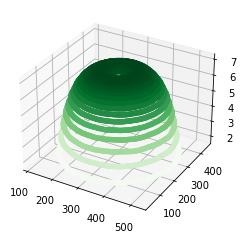

In [25]:
from mpl_toolkits import mplot3d

get_ipython().run_line_magic('matplotlib', 'inline')

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = file_1["z"]
xdata = file_1[" x"]
ydata = file_1[" y"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [19]:
# command to save CSV without index 

#file_1.to_csv("power_48_270degree_Thershold_Findings.csv" , index = False)

# command to save CSV without index 

# file.to_csv("power_comp_11.csv" , index = False)

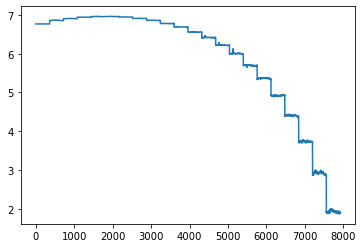

In [23]:
## Visualization of theta value 

plt.plot(file_1["z"])


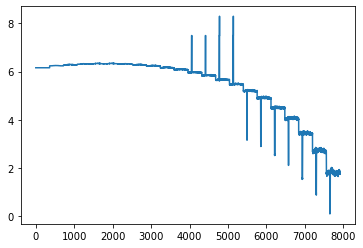

In [345]:
file_1 = cornealProfile(file_name_8, "itr" )

plt.plot(file_1["z"])

## Power Computation

In [346]:
 def powerComputation(file_name , method):
        
        from decimal import Decimal, getcontext
        
        file = cornealProfile(file_name, method)
        
        x_ = file[" radius"]*0.021739
        y_ = file["z"]
     #   y_ = np.max(y_) - y_
        t = file["t"]
        #file["z_"] = y_
        
        R1 = []
        for j in range(len(x_)):
            e = x_[j]/(np.sin(t[j]))      #*(np.pi/180)))
            R1.append(e)
        
        power = []
        ll = []
        for ang in range(1, 60):
            temp_file = file[file[" Angle"] == ang]
            x = temp_file[" radius"]*0.021739
            x = list(x)
            x = [Decimal(x) for x in x]
            y = temp_file["z"]
            y = list(y)
            y = [Decimal(y) for y in y]
            
            R2 = []
            l = []
        
            for i in range(1,len(x)-1):
                k1 = ((x[i+1] - x[i-1])*(x[i-1]-x[i])*(x[i]-x[i+1])+((y[i-1])**2-(y[i])**2)*(x[i]-x[i+1])+((y[i+1])**2-(y[i])**2)*(x[i-1]-x[i]))
                k2 = 2*((y[i-1]-y[i])*(x[i]-x[i+1])+(y[i+1]-y[i])*(x[i-1]-x[i]))
                
                if k2 ==0:
                    l.append(i)
                
                k = k1/k2
                
                h_1 = x[i]+x[i-1]
                h_2 = (y[i-1]+y[i]-2*k)*(y[i-1]-y[i])/(x[i-1]-x[i])
                
                h = Decimal(0.5)*(h_1 - h_2)
               # h = Decimal(0.5)*(x[i-1]+x[i] - ((y[i-1]+y[i]-2*k)*(y[i-1]-y[i])/(x[i-1]-x[i])))
                p = np.sqrt((x[i-1]-h)**2+(y[i-1]-k)**2)
                R2.append(Decimal(337.5)/p)                

            power.append(R2)
            if len(l) != 0:
                ll.append([ang , l])
        # Now Powers will be
        K1 = []
        for i1 in range(len(x_)):
            m1 = 337.5/R1[i1]
            K1.append(m1)
            
        return(K1 ,power , ll)

In [347]:
file_name = "48_270degree_Thershold_Findings"

K1 , power, ll = powerComputation(file_name_5, "itr")

<ipython-input-346-4734cd237598>:15: RuntimeWarning: divide by zero encountered in double_scalars
  e = x_[j]/(np.sin(t[j]))      #*(np.pi/180)))


(-200.0, 100.0)

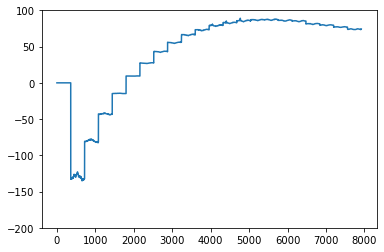

In [348]:
plt.plot(K1, scaley = True)

plt.ylim([-200, 100])

In [349]:
max(K1)

89.12718499032611

(-200.0, 100.0)

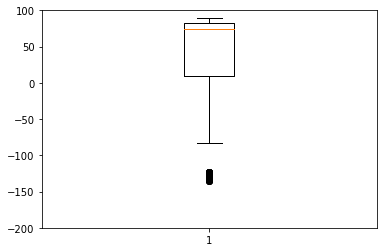

In [350]:
plt.boxplot(K1)
plt.ylim([-200,100])

In [351]:
power[50]

[Decimal('571.5850600891300131016221583'),
 Decimal('0.3974774421404560286666970672'),
 Decimal('245.9857423140365976853096579'),
 Decimal('142.4981510885248592618268456'),
 Decimal('154.0364244680781094867050810'),
 Decimal('297.5515237790781418205572023'),
 Decimal('71.59592478742891948582924170'),
 Decimal('498.0645171644421467694253108'),
 Decimal('11.42750731513513752189754757'),
 Decimal('1611.683498377025932064594063'),
 Decimal('366.3404220995394643375377031'),
 Decimal('2289.627405292939211995949679'),
 Decimal('530.2188813184822008725529875'),
 Decimal('446.5209132054017036520406029'),
 Decimal('46.11349801388667722208377488'),
 Decimal('176.3523067382581015017495165'),
 Decimal('15.58879580881391481669543213'),
 Decimal('58.83103980771090219174822595'),
 Decimal('16.35426286538853137640603037'),
 Decimal('20.87640263299849872522286742')]

In [352]:
ll

[]

In [165]:
for ang in range(10):
    temp_file = file_1[file_1[" Angle"] == ang]
    x = temp_file[" x"]
    y = temp_file["z"]

9       323.7544
369     324.6930
729     325.9445
1089    326.8831
1449    328.1346
1809    329.2296
2169    330.3247
2529    331.4197
2889    332.6712
3249    333.9227
3609    335.0177
3969    336.1128
4329    337.3642
4689    338.4593
5049    339.7108
5409    340.8058
5769    342.0573
6129    343.3087
6489    344.5602
6849    345.9681
7209    347.0632
7569    348.6275
Name:  x, dtype: float64 9        7.800000
369      7.720136
729      7.684315
1089     7.651017
1449     7.637523
1809     7.635546
2169     7.648366
2529     7.676285
2889     7.720728
3249     7.792086
3609     7.885339
3969     7.987864
4329     8.114844
4689     8.292745
5049     8.484269
5409     8.755818
5769     9.051192
6129     9.493031
6489    10.052026
6849    10.787957
7209    12.176474
7569    14.949436
Name: z, dtype: float64
9       323.7544
369     324.6930
729     325.9445
1089    326.8831
1449    328.1346
1809    329.2296
2169    330.3247
2529    331.4197
2889    332.6712
3249    333.9227
3609    335

In [355]:
temp_file = file_1[file_1[" Angle"] == 1]
x = temp_file[" radius"]
x = list(x)
y = temp_file["z"]
y = list(y)

In [356]:
print("x        y ")
for i in range(len(x)):
    print(x[i],y[i])

x        y 
24 6.1602135800726066
30 6.239543903597461
38 6.2750184103332
45 6.307659436185081
52 6.322634612512053
59 6.323383846412274
67 6.309347030129982
74 6.275829819043009
82 6.229807181183126
89 6.15648361324439
97 6.073121450396293
104 5.954086857341991
111 5.825880100261571
119 5.669877990672309
127 5.452845944285174
135 5.187782788049169
142 4.8658698371246185
150 4.511811447863907
158 4.028416291992802
166 3.450414226726013
173 2.6930495533618624
182 1.8589153410588564


In [353]:
for j in range(60):
    
    temp_file = file_1[file_1[" Angle"] == j]
    x = temp_file[" x"]
    x = list(x)
    y = temp_file["z"]
    y = list(y)

    x = [Decimal(x) for x in x ]
    y = [Decimal(y) for y in y ]


    for i in range(1 , len(x) -1):
        k2 = (2*((y[i-1]-y[i])*(x[i]-x[i+1])+(y[i+1]-y[i])*(x[i-1]-x[i])))

        if k2 ==0:
            print(j, i)


0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
